<a href="https://colab.research.google.com/github/rrstats/Coursework-Foundations-of-Data-Science-/blob/main/L31_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

In [ ]:
# x = (in standard units)
(90 - 70)/10

2.0

In [ ]:
#predicted final score in standard units

0.75 * 2 

1.5

In [ ]:
#predicted final score

y = 1.5 * 12 + 50
y

68.0

In [ ]:
(0.75)*(-1)*12 + 50 

41.0

In [ ]:
## Discussion Question

# Oval scatter diagram

# Heights: average 68 inches, SD 3 inches
# Weights: average 150 lb, SD 20 lb
# r = 0.6

# Predict heights based on weight 

In [ ]:
#units: inches per pound
slope = 0.6 * 3/20
slope

0.09

In [ ]:
intercept = 68 - slope*150
intercept

54.5

In [ ]:
#Equation of regression line
#estimated y = 0.09 * weight + 54.5

### Linear Regression: defining the line

In [ ]:
def standard_units(x):
  return(x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
  x_su = standard_units(t.column(x))
  y_su = standard_units(t.column(y))
  return np.mean(x_su * y_su)

In [ ]:
def slope(t, x, y):
  "Computes the slope of the regression"
  r = correlation(t, x, y)
  y_sd = np.std(t.column(y))
  x_sd = np.std(t.column(x))
  return r * (y_sd/x_sd)

def intercept(t, x, y):
  "Computes intercept of the regression line"
  "Formula: mean of y - mean of x"
  y_mean = np.mean(t.column(y))
  x_mean = np.mean(t.column(x))
  return y_mean - slope(t, x, y) *x_mean


In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')

0.5022638281625915

### Height Data And Regression Line

In [ ]:
family_heights = Table.read_table('family_heights.csv').drop(3)
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights.show(5)

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5


In [ ]:
def nn_prediction(h):
  """Predict the height of a Child 
  whose parent's have a midparent height of h
  
  The prediction is the average height of the 
  children whose midparent height is in the range h 
  plus minus 0.5 inches"""

  """Nearest Neighbour"""
  neighbors = heights.where(
      'Parent Average', are.between(h-0.5, h+0.5))
  return np.mean(neighbors.column('Child'))

In [ ]:
heights_with_predictions = heights.with_column(
    'Nearest neighbour prediction',
    heights.apply(nn_prediction, 'Parent Average')
)

In [ ]:
predicted_slope = slope(heights, 'Parent Average', 'Child')
predicted_slope

0.6644952623525884

In [ ]:
predicted_intercept = intercept(heights, 'Parent Average', 'Child')
predicted_intercept

22.461839955758798

#### That gives us a linear regression model for predicting the height of the child from the height of the parents

In [ ]:
heights.take(100)

Parent Average,Child
67.5,73


In [ ]:
nn_prediction(67.5)

67.46184210526316

In [ ]:
predicted_intercept + predicted_slope*67.5

67.31527016455851

### Let's visualize the graph of predictions for both approaches to prediction

In [ ]:
heights_with_predictions = heights_with_predictions.with_column(
  'Regression prediction',
  predicted_slope*heights.column('Parent Average') + predicted_intercept
)
heights_with_predictions

Parent Average,Child,Nearest neighbour prediction,Regression prediction
72.75,73.2,70.1,70.8039
72.75,69.2,70.1,70.8039
72.75,69,70.1,70.8039
72.75,69,70.1,70.8039
71,73.5,70.4158,69.641
71,72.5,70.4158,69.641
71,65.5,70.4158,69.641
71,65.5,70.4158,69.641
69.5,71,68.5025,68.6443
69.5,68,68.5025,68.6443


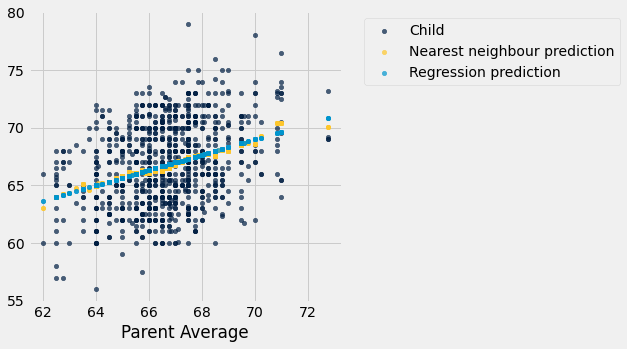

In [ ]:
heights_with_predictions.scatter('Parent Average')

### Regression Line vs other lines

In [ ]:
def demographics_errors(slope, intercept):
  #Use four convenient points fromnm the original data
  sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
  demographics.scatter('College%', 'Median Income', alpha=0.5)
  xlims = make_array(5, 75)
  #Plot a line with the slope and intercept that you specified:
  plt.plot(xlims, slope*xlims + intercept, lw=4)
  #Plot red lines from each of the four points to the line
  for x, y in sample:
    plt.plot([x,x], [y, slope*x + intercept], color='r', lw=4)

In [ ]:
def fitted_values(t, x, y):
  "Return an array of the regression estimates at all the x values"
  a = slope(t, x, y)
  b = intercept(t, x, y)
  return a*t.column(x) + b

In [ ]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [ ]:
demographics = demographics.select('Median Income', 'College%')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


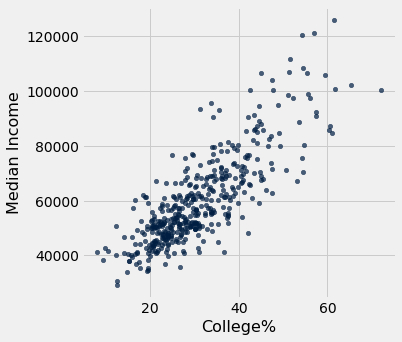

In [ ]:
demographics.scatter('College%', 'Median Income')

In [ ]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [ ]:
regression_slope = slope(demographics, 'College%', 'Median Income')

In [ ]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)

In [ ]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

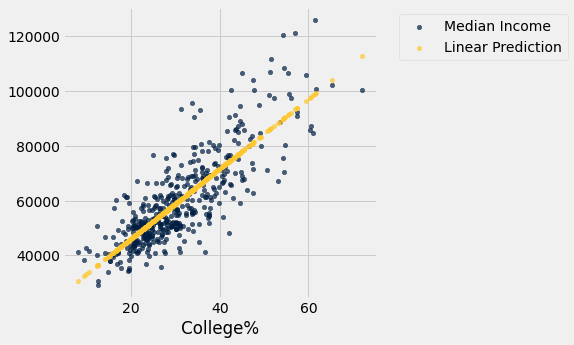

In [ ]:
demographics = demographics.with_column(
    'Linear Prediction', predicted
)
demographics.scatter('College%')

### Of course the linear model is not perfect, there will typically be some errors in the prediction. 
### Let's measure how large those errors are and visualize them

In [ ]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [ ]:
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [ ]:
#Its tempting to measure the quality of a linear regression model
# by taking the average error.
#However, this doesn't work.
#=0

In [ ]:
np.mean(errors)
# =0

6.356008950321154e-13

In [ ]:
np.mean(errors ** 2) ** 0.5

9398.515588571281

In [ ]:
#Interpretation of 9398.515588

In [ ]:
#Its going to be off by $9398 if you make a prediction